<a href="https://colab.research.google.com/github/t00fi/Hooshyar_Wecode_MA/blob/master/Copy_of_TE_v3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libaries**

In [ ]:
import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from google.colab import drive
from keras.callbacks import EarlyStopping

# **MODEL**

In [ ]:
def conv_block(inputs, filters, kernel_size, strides, name):
  x = tf.keras.layers.Conv2D(filters, kernel_size, strides=strides, padding='same', name=name+'_conv1')(inputs)
  x = tf.keras.layers.BatchNormalization(name=name+'_bn1')(x)
  x = tf.keras.layers.ReLU(name=name+'_relu1')(x)

  x = tf.keras.layers.Conv2D(filters, kernel_size, strides=1, padding='same', name=name+'_conv2')(x)
  x = tf.keras.layers.BatchNormalization(name=name+'_bn2')(x)

  shortcut = tf.keras.layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same', name=name+'_shortcut_conv')(inputs)
  shortcut = tf.keras.layers.BatchNormalization(name=name+'_shortcut_bn')(shortcut)

  x = tf.keras.layers.add([x, shortcut], name=name+'_add')
  x = tf.keras.layers.ReLU(name=name+'_relu2')(x)

  return x

In [ ]:
def identity_block(inputs, filters, kernel_size, name):
  x = tf.keras.layers.Conv2D(filters, kernel_size, strides=1, padding='same', name=name+'_conv1')(inputs)
  x = tf.keras.layers.BatchNormalization(name=name+'_bn1')(x)
  x = tf.keras.layers.ReLU(name=name+'_relu1')(x)

  x = tf.keras.layers.Conv2D(filters, kernel_size, strides=1, padding='same', name=name+'_conv2')(x)
  x = tf.keras.layers.BatchNormalization(name=name+'_bn2')(x)

  x = tf.keras.layers.add([x, inputs], name=name+'_add')
  x = tf.keras.layers.ReLU(name=name+'_relu2')(x)

  return x

In [ ]:
def ResNet101(input_shape=(224,224,3), num_classes=1000):
  inputs = tf.keras.layers.Input(shape=input_shape)

  x = tf.keras.layers.ZeroPadding2D(padding=(3,3))(inputs)
  x = tf.keras.layers.Conv2D(64, 7, strides=2, name='conv1_conv')(x)
  x = tf.keras.layers.BatchNormalization(name='conv1_bn')(x)
  x = tf.keras.layers.ReLU(name='conv1_relu')(x)
  x = tf.keras.layers.ZeroPadding2D(padding=(1,1))(x)
  x = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2, name='pool1_pool')(x)

  x = conv_block(x, 256, 3, strides=1, name='conv2_block1')
  x = identity_block(x, 256, 3, name='conv2_block2')
  x = identity_block(x, 256, 3, name='conv2_block3')

  x = conv_block(x, 512, 3, strides=2, name='conv3_block1')
  x = identity_block(x, 512, 3, name='conv3_block2')
  x = identity_block(x, 512, 3, name='conv3_block3')
  x = identity_block(x, 512, 3, name='conv3_block4')

  x = conv_block(x, 1024, 3, strides=2, name='conv4_block1')
  for i in range(22):
    x = identity_block(x, 1024, 3, name='conv4_block'+str(i+2))

  x = conv_block(x, 2048, 3, strides=2, name='conv5_block1')
  x = identity_block(x, 2048, 3, name='conv5_block2')
  x = identity_block(x, 2048, 3, name='conv5_block3')

  x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
  x = tf.keras.layers.Dense(num_classes, activation='softmax', name='predictions')(x)

  model = tf.keras.Model(inputs=inputs, outputs=x, name='resnet101')

  return model

# DATA PREPARATION

In [ ]:
#Access to google drive
drive.mount('/content/drive')
#load the data from google drive
train_images = np.load('/content/drive/MyDrive/train_images.npy')
train_labels = np.load('/content/drive/MyDrive/train_labels.npy')

Mounted at /content/drive


In [ ]:
train_labels = to_categorical(train_labels, num_classes=4)

# TRAINING

In [ ]:
model = ResNet101(input_shape=(224, 224, 3), num_classes=4)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model.fit(train_images, train_labels, batch_size=16, epochs=100, validation_split=0.2)

Epoch 1/100
125/125 [==============================] - 143s 631ms/step - loss: 2.1718 - accuracy: 0.3229 - val_loss: 1.4753 - val_accuracy: 0.3273
Epoch 2/100
125/125 [==============================] - 76s 607ms/step - loss: 1.6414 - accuracy: 0.3340 - val_loss: 610.8054 - val_accuracy: 0.2028
Epoch 3/100
125/125 [==============================] - 76s 607ms/step - loss: 1.5305 - accuracy: 0.3853 - val_loss: 20.2230 - val_accuracy: 0.3494
Epoch 4/100
125/125 [==============================] - 76s 606ms/step - loss: 1.5549 - accuracy: 0.3375 - val_loss: 10.3126 - val_accuracy: 0.3554
Epoch 5/100
125/125 [==============================] - 76s 607ms/step - loss: 1.4419 - accuracy: 0.3753 - val_loss: 404.0771 - val_accuracy: 0.3514
Epoch 6/100
125/125 [==============================] - 81s 647ms/step - loss: 1.4752 - accuracy: 0.3843 - val_loss: 4.8962 - val_accuracy: 0.3414
Epoch 7/100
125/125 [==============================] - 81s 647ms/step - loss: 1.5140 - accuracy: 0.3763 - val_loss: 1

# Testing

In [ ]:
#PREPARE DATA TO FOR TESTING
test_images = np.load('/content/drive/MyDrive/test_images.npy')
test_labels = np.load('/content/drive/MyDrive/test_labels.npy')

In [ ]:
test_labels = to_categorical(test_labels, num_classes=4)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

20/20 [==============================] - 8s 328ms/step - loss: 2.0486 - accuracy: 0.6416
Test loss: 2.048602819442749
Test accuracy: 0.6416000127792358


# PLOT

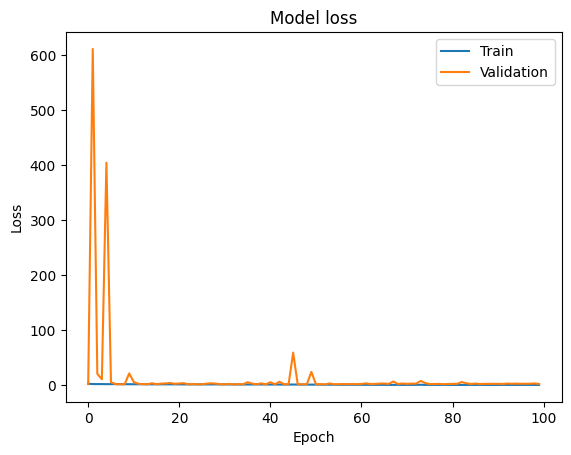

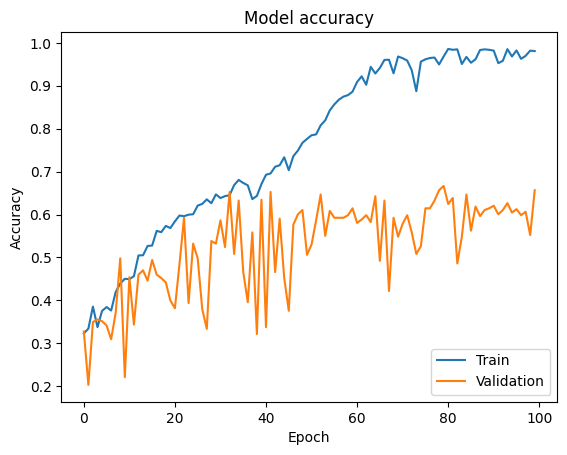

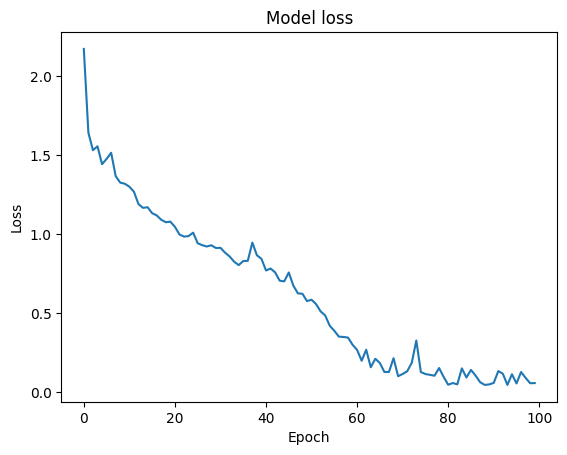

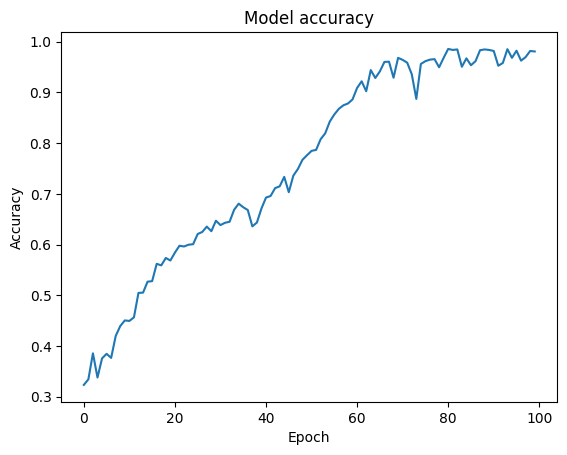

In [ ]:
import matplotlib.pyplot as plt


# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# SAVE MODEL

In [ ]:
model.save('/content/drive/MyDrive/model.h5')
#model.save('model.h5')

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/model.h5')